In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [126]:
df=pd.read_csv("cars.csv")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [128]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [129]:
from sklearn.impute import SimpleImputer

In [130]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

In [131]:
df["normalized-losses"]=df["normalized-losses"].astype("float64")
df["horsepower"]=df["horsepower"].astype("float64")

In [132]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])

In [133]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [134]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [135]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


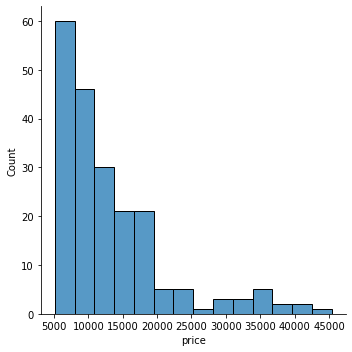

In [136]:
sns.displot(data=target)

<AxesSubplot:xlabel='price'>

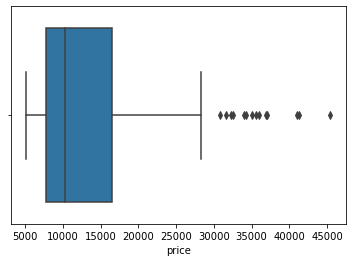

In [137]:
sns.boxplot(data=df,x=target)

In [138]:
!pip install plotly

In [139]:
import plotly.express as px
t=px.data.tips()
fig=px.box(target)
fig.show()

In [140]:
t=px.data.tips()
fig=px.box(features,x=target,y="make")
fig.show()

<AxesSubplot:xlabel='price', ylabel='make'>

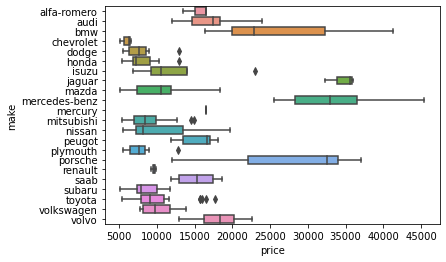

In [141]:
sns.boxplot(data=features,x=target,y="make")

In [142]:
features[(features["make"]=="dodge") & (target>8921)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [143]:
features.drop(29,axis=0,inplace=True)

In [144]:
target.drop(29,axis=0,inplace=True)

In [145]:
features[(features["make"]=="dodge") & (target>8921)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg


In [146]:
features[(features["make"]=="toyota") & (target>15998)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24


In [147]:
i=features[(features["make"]=="toyota") & (target>15998)].index
features.drop(i,axis=0,inplace=True)

In [148]:
target.drop(i,axis=0,inplace=True)

In [149]:
features[(features["make"]=="toyota") & (target>15998)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg


In [150]:
features[(features["make"]=="honda") & (target>9395)]
features.drop([40,41,42],axis=0,inplace=True)
target.drop([40,41,42],axis=0,inplace=True)

In [151]:
i=features[(features["make"]=="isuzu") & (target>17000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [152]:
i=features[(features["make"]=="mitsubishi") & (target>11000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [153]:
i=features[(features["make"]=="plymouth") & (target>8921)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [154]:
i=features[(features["make"]=="toyota") & (target>15000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

<AxesSubplot:xlabel='price', ylabel='make'>

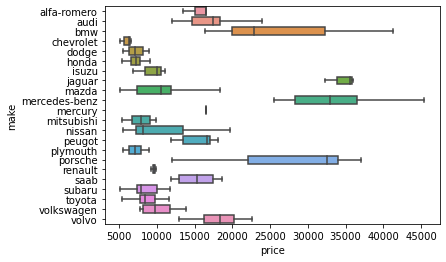

In [155]:
sns.boxplot(data=features,x=target,y="make")

In [156]:
features[(features["make"]=="mercury")]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
75,1,122.0,mercury,gas,hatchback,rwd,front,68.0,54.8,ohc,140,175.0,19,24


In [157]:
df[df["make"]=="mercury"].index

Int64Index([75], dtype='int64')

In [158]:
target.iloc[75]

9959

In [159]:
features.iloc[75,:]

symboling                     3
normalized-losses         153.0
make                 mitsubishi
fuel-type                   gas
body-style            hatchback
drive-wheels                fwd
engine-location           front
width                      65.4
height                     49.4
engine-type                 ohc
engine-size                 110
horsepower                116.0
city-mpg                     23
highway-mpg                  30
Name: 80, dtype: object

In [160]:
# Skewness removal

In [161]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   make               191 non-null    object 
 3   fuel-type          191 non-null    object 
 4   body-style         191 non-null    object 
 5   drive-wheels       191 non-null    object 
 6   engine-location    191 non-null    object 
 7   width              191 non-null    float64
 8   height             191 non-null    float64
 9   engine-type        191 non-null    object 
 10  engine-size        191 non-null    int64  
 11  horsepower         191 non-null    float64
 12  city-mpg           191 non-null    int64  
 13  highway-mpg        191 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.4+ KB


In [162]:
colname=features.select_dtypes(["float64","int64"]).columns

In [163]:
features[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


In [164]:
from scipy.stats import skew

In [165]:
skew(features["normalized-losses"])

0.8355271321292326

symboling
0.20852128897880182


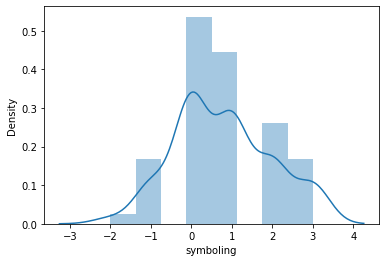

normalized-losses
0.8355271321292326


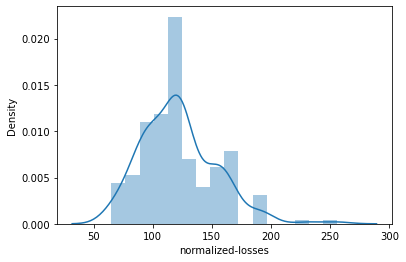

width
0.9233175535392493


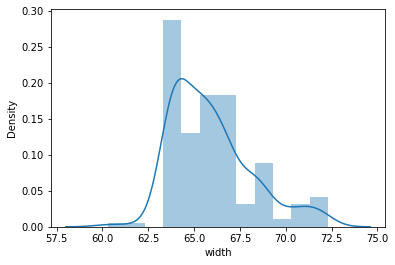

height
-0.00032469419681068097


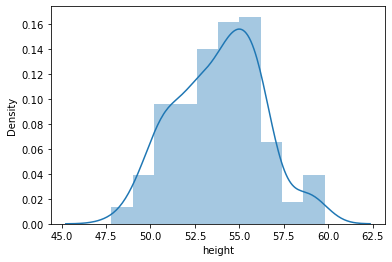

engine-size
2.049142065812302


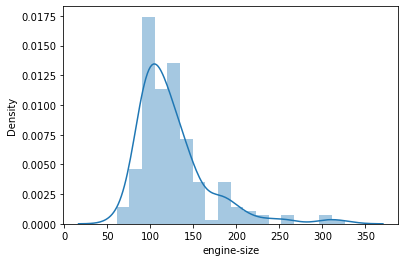

horsepower
1.5631842359574493


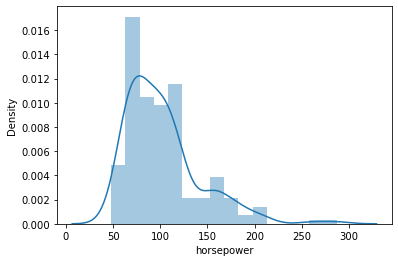

city-mpg
0.5923040642413773


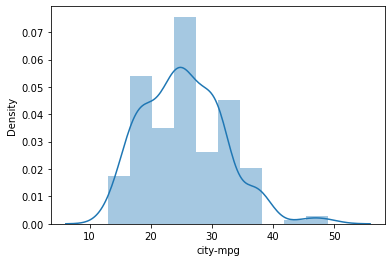

highway-mpg
0.47049709328895595


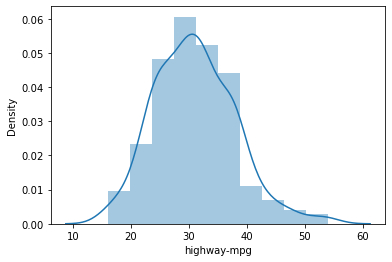

In [166]:
for col in features[colname]:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()
    

In [167]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


In [168]:
pd.concat([features,target],axis=1).corr()["price"].sort_values()
#h-m,w,hp,e-s-highly corr with target

highway-mpg         -0.707122
city-mpg            -0.682634
symboling           -0.097242
normalized-losses    0.127662
height               0.146146
width                0.732957
horsepower           0.771584
engine-size          0.870876
price                1.000000
Name: price, dtype: float64

In [169]:
features["normalized-losses"]=np.log(features["normalized-losses"])

In [170]:
skew(features["normalized-losses"])

0.0061510764084907665

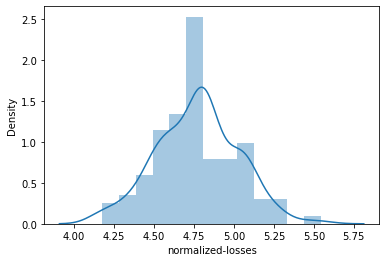

In [171]:
sns.distplot(features["normalized-losses"])
plt.show()

In [172]:
skew(np.sqrt(features["normalized-losses"]))

-0.07348447982136683

In [173]:
features["symboling"].value_counts()

 0    64
 1    53
 2    31
 3    20
-1    20
-2     3
Name: symboling, dtype: int64

In [174]:
np.sqrt(features["symboling"])

0      1.732051
1      1.732051
2      1.000000
3      1.414214
4      1.414214
         ...   
200         NaN
201         NaN
202         NaN
203         NaN
204         NaN
Name: symboling, Length: 191, dtype: float64

In [175]:
# Handling Categorical Values

In [176]:
colname=features.select_dtypes(["object"]).columns

In [177]:
colname

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [178]:
features["fuel-type"].value_counts()

gas       171
diesel     20
Name: fuel-type, dtype: int64

In [179]:
pd.get_dummies(features["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [180]:
pd.get_dummies(features["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
features["make"].nunique()

22

In [182]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(features[["make"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [183]:
#Label Encoding

In [184]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [185]:
le.fit_transform(features["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21])

In [186]:
#le.fit_transform(features[["make","fuel-type"]])

In [187]:
#ordinal encoding

In [188]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [189]:
oe.fit_transform(features[["make","fuel-type"]])

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,

In [190]:
colname

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [191]:
features[colname]=oe.fit_transform(features[colname])

In [192]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   make               191 non-null    float64
 3   fuel-type          191 non-null    float64
 4   body-style         191 non-null    float64
 5   drive-wheels       191 non-null    float64
 6   engine-location    191 non-null    float64
 7   width              191 non-null    float64
 8   height             191 non-null    float64
 9   engine-type        191 non-null    float64
 10  engine-size        191 non-null    int64  
 11  horsepower         191 non-null    float64
 12  city-mpg           191 non-null    int64  
 13  highway-mpg        191 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 22.4 KB


In [193]:
#Data Scaling

In [194]:
a=np.array([1,2,3,4,5])
b=np.array([10,20,30,40,50])
c=np.array([100,200,300,400,500])

In [195]:
def minmax(arr):
    xnew=(arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [196]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [197]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [198]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [199]:
def stddev(arr):
    xnew=(arr-arr.mean())/(arr.std())
    return xnew

In [200]:
stddev(a)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [201]:
stddev(b)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [202]:
stddev(c)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [203]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [204]:
mn.fit_transform(features.iloc[:,:])

array([[1.        , 0.45932177, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.45932177, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.6       , 0.45932177, 0.        , ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [0.2       , 0.27684005, 1.        , ..., 0.35833333, 0.13888889,
        0.18421053],
       [0.2       , 0.27684005, 1.        , ..., 0.24166667, 0.36111111,
        0.28947368],
       [0.2       , 0.27684005, 1.        , ..., 0.275     , 0.16666667,
        0.23684211]])

In [205]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [206]:
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [207]:
features.head(4)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,-0.186271,-0.596575,1.927419,0.625260,1.312895,-0.981219,-0.726376
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,0.133837,0.182752,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490


In [208]:
# feature engineering

In [209]:
features["area"]=features["width"]*features["height"]

In [210]:
features.head(4)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,-0.186271,-0.596575,1.927419,0.625260,1.312895,-0.981219,-0.726376,0.111124
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,0.133837,0.182752,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490,0.024459


In [211]:
features.drop(["width","height"],axis=1)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,1.927419,0.625260,1.312895,-0.981219,-0.726376,0.111124
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490,0.024459
4,1.020811,1.303434,-1.785837,0.341993,0.430625,-2.363516,-0.126323,-0.078777,0.245833,0.322388,-1.133588,-1.306263,0.041173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,-0.078777,0.364404,0.296991,-0.371747,-0.436433,0.923707
201,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,-0.078777,0.364404,1.465281,-0.981219,-0.871348,0.892842
202,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,1.927419,1.123258,0.804943,-1.133588,-1.161291,0.923707
203,-1.489596,-0.847717,1.398989,-2.924038,0.430625,1.219274,-0.126323,-0.078777,0.459261,0.093810,0.085358,-0.581405,0.923707


In [212]:
features.head(2)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467


In [213]:
#train test split

In [214]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [215]:
pet=["cat","dog","fish","turtle"]

In [216]:
a,b,c,d=pet

In [217]:
print(a,b,c,d)

cat dog fish turtle


In [218]:
xtrain.shape

(152, 15)

In [219]:
xtest.shape

(39, 15)

In [220]:
ytrain.shape

(152,)

In [221]:
ytest.shape

(39,)